# Data Wrangling : 'WeRateDogs' Twitter

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json
import datetime
import re
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Gathering Data

In [2]:
#reading enchanced twitter archive csv file into a dataframe
archive_df= pd.read_csv('twitter-archive-enhanced.csv', index_col = False)

In [3]:
#importing image prediction tsv file from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
file_name = url.split('/')[-1]

#saving the content of the url into a csv
if not os.path.isfile(file_name):
    with open(file_name , 'wb') as f:
        f.write(response.content)

In [4]:
#reading image prediction tsv file into a dataframe
image_pred_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#reading tweet_json.txt file line by line into a dataFrame
#I couldn’t gather it through twitter API, as the approval process was taking longer than it should to proceed the project.

df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)


# Assessing Data

In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [8]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [13]:
#Assessing the rating denominator values
archive_df.loc[(archive_df.rating_denominator > 10) & (archive_df.rating_denominator %10 == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [14]:
with pd.option_context('max_colwidth', 200):
    display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [15]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [16]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
sum(archive_df.duplicated())

0

In [18]:
sum(image_pred_df.jpg_url.duplicated())

66

In [19]:
duplicates= image_pred_df[image_pred_df.jpg_url.duplicated()]
duplicates
    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


<AxesSubplot:xlabel='tweet_id'>

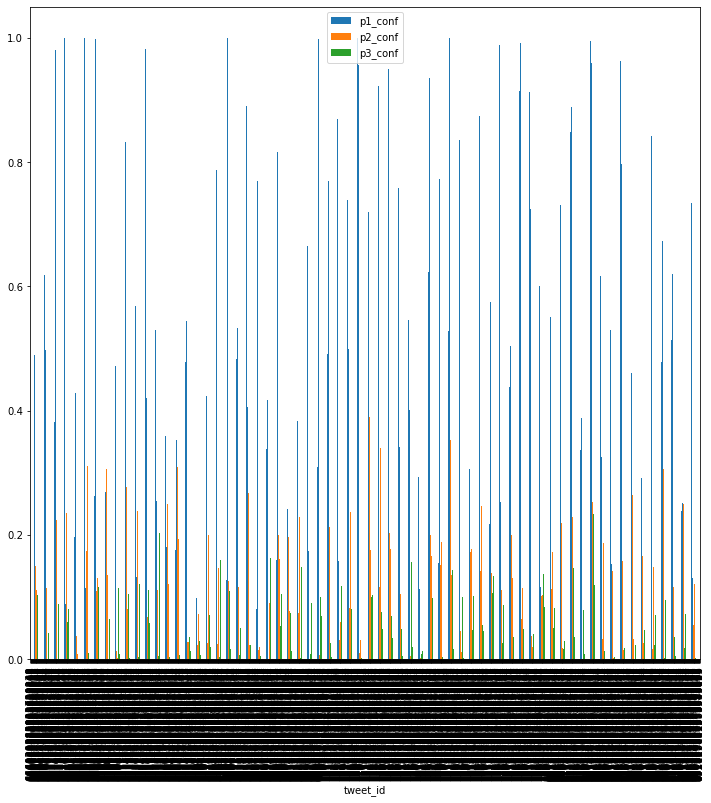

In [20]:
#plotting predictions 
image_pred_df.plot(x= 'tweet_id', y= ['p1_conf', 'p2_conf', 'p3_conf'], kind = 'bar', figsize = (12,12))
#after plotting, clearly the first predication is almost very accurate

In [21]:
#original data without retweets
archive_df[archive_df['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
sum(archive_df.text.duplicated())

0

# Assessment Output

## Quality

#### *archive_df*

- timestamp column data type is an object not datetime 
- name column contains null values under "None" not Nan , or have weird names as a, an
- Data types of columns: (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) is float, could be string since we aren't doing any actions on them. (could be dropped too)
- Some rows doesn't have pet's classifications
- Some tweet ids have collective ratings for packs of dogs (not rated individually)
- inaccurate numerator ratings because data type of ratings columns are int , not float
- source column can hardly be read



#### *image_pred_df*
- Number of data entries in this table is only 2075 while in archive_df is 2356 (#tweet_ids without image)
- Non descriptive column names (p1_conf, p1_dog, p2_conf, p2_dog, p3_conf, p3_dog)
- some tweets are retweets and replies
- tweet ids with the same jpg_url (Duplicate data)
- columns of predictions and configurations (first predictions are stastically are always higher), so we might exclude the other two predictions

# Tidiness

#### *archive_df*

- column headers (doggo, floofer, pupper, puppo) are values, not variable names


#### Merging Dataframes
- merge image_pred_df and api_df into archive_df

# Cleaning Data


In [23]:
archive_df_clean = archive_df.copy()
image_pred_df_clean = image_pred_df.copy()
api_df_clean = api_df.copy()

### Tidiness #1
#### Merging Dataframes

### Define 
##### merging the image_pred_df and api_df into one dataframe archive_df , based on tweet_id column 

### Code

In [24]:
#merging api_df_clean into archive_df_clean
archive_df_clean= pd.merge(archive_df_clean, api_df_clean , on= 'tweet_id', how= 'inner')

In [25]:
#merging image_pred_df_clean into archive_df_clean
#also this solved the data quality issue; where tweet_ids without photos are dropped
archive_df_clean = pd.merge(archive_df_clean, image_pred_df_clean, on= 'tweet_id', how= 'inner')

### Test

In [26]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Quality 
#### Dropping retweets and replies
### Define 
##### removing retweets and replies from archive_df table

### Code

In [27]:
#removing retweets from archive_df_clean
archive_df_clean= archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

In [28]:
#removing replies from archive_df_clean
archive_df_clean = archive_df_clean[archive_df_clean['in_reply_to_status_id'].isnull()]

### Test

In [29]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

### Quality 
#### Dropping unnecessary columns
### Define 
##### removing columns (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
### Code

In [30]:
#dropping unnecessary columns
archive_df_clean=archive_df_clean.drop(columns= ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                                 'retweeted_status_user_id',
                                                 'retweeted_status_timestamp'])

### Test

In [31]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  retweet_count       1971 non-null   int64  
 13  favorite_count      1971 non-null   int64  
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   int64  
 16  p1    

#### Non descriptive column names
### Define
#### renaming columns with descriptive header names
### Code:

In [32]:
#renaming columns with descriptive header names
archive_df_clean =archive_df_clean.rename(columns ={'p1':'predication_1','p2':'predication_2','p3':'predication_3'})
archive_df_clean =archive_df_clean.rename(columns ={'p1_conf':'confidence_1',
                                                   'p2_conf':'confidence_2',
                                                   'p3_conf':'confidence_3',
                                                   'p1_dog':'breed_1',
                                                   'p2_dog':'breed_2',
                                                   'p3_dog':'breed_3'})

### Test:

In [33]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  retweet_count       1971 non-null   int64  
 13  favorite_count      1971 non-null   int64  
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   int64  
 16  predic

# Tidiness 
#### column headers (doggo, floofer, pupper, puppo) are values, not variable names
### Define
#### re-constructing columns  (doggo, floofer, pupper, puppo)
### Code

In [34]:
#replacing none value with empty string
archive_df_clean.iloc[:, 8:12] = archive_df_clean.iloc[:, 8:12].replace('None','')

In [35]:
#creating a new column dog_stage
archive_df_clean['dog_stage'] = archive_df_clean.doggo + archive_df_clean.floofer + archive_df_clean.pupper + archive_df_clean.puppo

In [36]:
archive_df_clean.loc[archive_df_clean.dog_stage == "", 'dog_stage'] = np.nan

In [37]:
#separting dog_stage with "-"
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [38]:
#removing 'doggo', 'floofer', 'pupper', 'puppo' columns
archive_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test:

In [39]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   retweet_count       1971 non-null   int64  
 9   favorite_count      1971 non-null   int64  
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   int64  
 12  predication_1       1971 non-null   object 
 13  confidence_1        1971 non-null   float64
 14  breed_1             1971 non-null   bool   
 15  predication_2       1971 non-null   object 
 16  confid

In [40]:
archive_df_clean.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

# Quality
#### (name column) contains null values under "None" not Nan , or have weird names as a, an
### Define
#### replacing weird values in the (name column) with Nan
### Code

In [41]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df_clean.iterrows():  
    try:
        if row['name'] == "None":
            c_name = re.findall(pattern, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('None', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'a':
            c_name = re.findall(pattern, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('a', c_name) 
            
    except IndexError:
        archive_df_clean.loc[index,'name'] = np.nan

### Test:

In [42]:
archive_df_clean.name.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
           ..
Fizz        1
Halo        1
Zoe         1
Ulysses     1
Ivar        1
Name: name, Length: 956, dtype: int64

# Quality
### Define
#### changing datatypes
### Code

In [43]:
archive_df_clean['timestamp']= pd.to_datetime(archive_df_clean['timestamp'])
archive_df_clean['rating_numerator']= archive_df_clean['rating_numerator'].astype(float)
archive_df_clean['rating_denominator']= archive_df_clean['rating_denominator'].astype(float)

### Test

In [44]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1415 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  predication_1       1971 non-null 

# Quality
### Define
#### fixing the rating numerator
### Code

In [45]:
#inspecting values where ratings numerator needs to be updated
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean[archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [46]:
archive_df_clean.at[40,'rating_numerator']=13.5
archive_df_clean.at[558,'rating_numerator']=9.75
archive_df_clean.at[614,'rating_numerator']=11.27
archive_df_clean.at[1451,'rating_numerator']=11.26

### Test:

In [47]:
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean[archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


# Quality
### Define
#### cleaning source column
### Code

In [48]:
archive_df_clean['source'] = archive_df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [49]:
archive_df_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

# Quality
### Define
#### cleaning rating denominator
### Code

In [50]:
#displaying rows where denominator is higher than 40 (as it maybe ratings for group of dogs)
dogs =(archive_df_clean[archive_df_clean['rating_denominator'] > 40][['tweet_id','text',
                                                                    'rating_numerator','rating_denominator']])


In [51]:
with pd.option_context('max_colwidth', 200):
    display(dogs)

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1380,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
1512,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0


In [52]:
#calculating number of dogs the tweet_id is featuring
dogs_count = archive_df_clean.rating_denominator[archive_df_clean.rating_numerator >= 40]/10
archive_df_clean.loc[archive_df_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_df_clean.rating_numerator[archive_df_clean.rating_numerator >= 40]/dogs_count , 10]

In [53]:
print(dogs_count)

345      7.0
734     15.0
802      1.0
924     17.0
1001     5.0
1022     9.0
1047     8.0
1065     5.0
1131     5.0
1207     4.0
1380    11.0
1512    12.0
1571     8.0
1795     1.0
Name: rating_denominator, dtype: float64


### Test

In [54]:
#investigating changes through tweet_id
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean.loc[archive_df_clean.tweet_id ==713900603437621249][['tweet_id','text',
                                                                    'rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.0,10.0


# Quality
### Define
#### Dropping the other two prediction columns
### Code

In [55]:
#droping the other two predictions
archive_df_clean=archive_df_clean.drop(columns= ['predication_2','breed_2','confidence_2',
                                                'predication_3','breed_3','confidence_3'])

### Test

In [56]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1415 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  predication_1       1971 non-null 

# Storing

In [57]:
#saving dataframe into a csv file
archive_df_clean.to_csv('twitter_archive_master.csv', index= False)

In [58]:
#Testing
df= pd.read_csv('twitter_archive_master.csv')

In [59]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,predication_1,confidence_1,breed_1,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   float64
 6   rating_denominator  1971 non-null   float64
 7   name                1415 non-null   object 
 8   retweet_count       1971 non-null   int64  
 9   favorite_count      1971 non-null   int64  
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   int64  
 12  predication_1       1971 non-null   object 
 13  confidence_1        1971 non-null   float64
 14  breed_1             1971 non-null   bool   
 15  dog_stage           303 non-null    object 
dtypes: boo

# Data Visualizations & Insights

In [61]:
df.predication_1.value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
school_bus              1
carousel                1
shield                  1
bib                     1
restaurant              1
Name: predication_1, Length: 373, dtype: int64

In [62]:
df[df.predication_1 == 'golden_retriever'][['tweet_id','jpg_url']]

,tweet_id,jpg_url
14,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
16,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
39,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
41,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg
...,...,...
1902,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg
1908,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg
1916,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg
1947,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg


## Insight Result #1 : 
#### Golden Retriever is the most common prediction in this data set.

Text(0.5, 1.0, 'Favorite and Retweet Count Correlation')

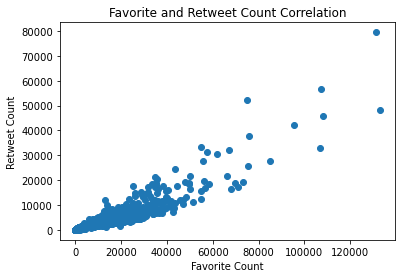

In [63]:
#Correlatrion between favorite and retweet count via scatter plot
x= df.favorite_count
y= df.retweet_count 
plt.scatter(x,y)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Favorite and Retweet Count Correlation')

## Insight Result #2 : 
#### Retweet and favorite counts are strongly correlated

Text(0.5, 1.0, 'Dog types and their counts')

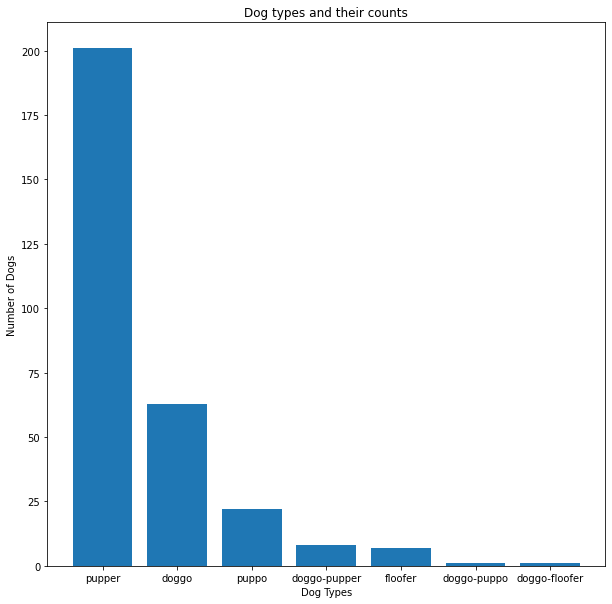

In [64]:
#visualizing value counts for dog types
sizes =  df.dog_stage.value_counts()
labels = 'pupper' , 'doggo', 'puppo' , 'doggo-pupper', 'floofer', 'doggo-puppo','doggo-floofer'
plt.subplots(figsize=(10,10))
plt.bar([1,2,3,4,5,6,7], sizes , tick_label=labels)
plt.xlabel('Dog Types')
plt.ylabel('Number of Dogs')
plt.title('Dog types and their counts')

## Insight Result #3 : 
#### Most popular dog type is pupper in this dataset.

In [65]:
df['timestamp']= pd.to_datetime(df['timestamp'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1415 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  predication_1       1971 non-null 

# Visualization
### Visualizing Retweet count versus timestamp

In [67]:
retweets = df.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
.reset_index().sort_values('timestamp')[:-1]

Text(0, 0.5, 'Count Retweets')

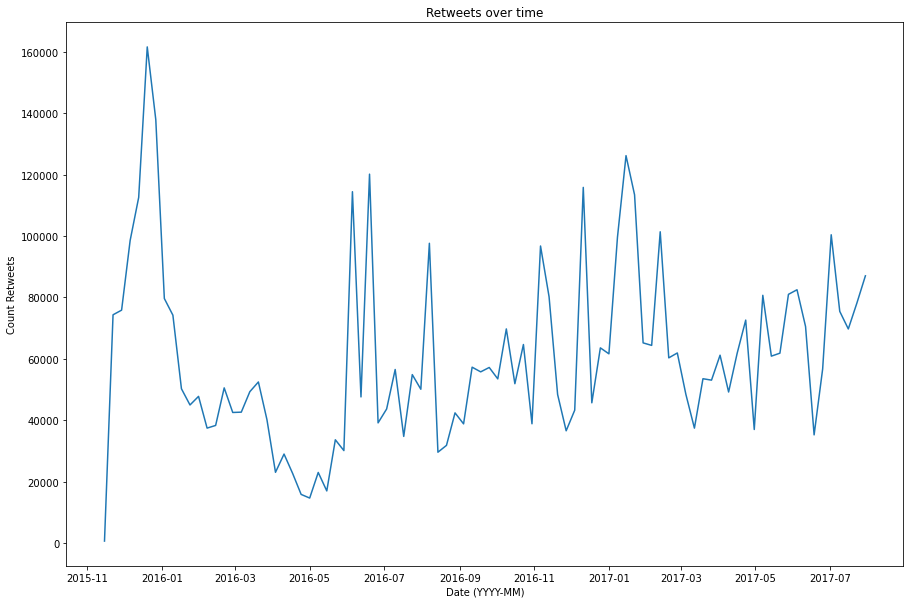

In [68]:
plt.subplots(figsize=(15, 10))
plt.plot(retweets.timestamp, retweets.retweet_count)
plt.title('Retweets over time')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count Retweets')